#Imports and Installs

In [1]:
pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install geopandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from shapely import wkt
from sklearn import preprocessing
import seaborn as sns
import hvplot.pandas
pd.options.plotting.backend = 'holoviews'


# fig, ax = plt.subplots(figsize=(8,6))

# building_aesthetic=pd.read_csv('ApartmentBuildingEvaluation.csv')

# neighborhood_data=gpd.read_file('Neighbourhoods.shp')

# # neighborhood_data.hvplot(facecolor='white',
# #                        edgecolor='grey',
# #                        ax=ax)



# building_aesthetic.hvplot(x='LONGITUDE',
#           y='LATITUDE',
#           kind='scatter',
#           c='SCORE',
#           cmap='RdBu',
#           alpha=0.4,
          # ax=ax)



In [12]:
building_aesthetic['SCORE'].hist(bins=100)

:Histogram   [SCORE]   (SCORE_count)

In [ ]:
# Combining the Shape File with the DataFrame




In [ ]:
#Top_apartments=clipped_building_aesthetic.sort_values('SCORE').iloc[0:100]

In [ ]:
building_aesthetic_gdf=gpd.GeoDataFrame(
    building_aesthetic,geometry=gpd.points_from_xy(building_aesthetic['LONGITUDE'],
                                                   building_aesthetic['LATITUDE']))

In [ ]:
building_aesthetic_gdf

,_id,RSN,YEAR_REGISTERED,YEAR_EVALUATED,YEAR_BUILT,PROPERTY_TYPE,WARD,WARDNAME,SITE_ADDRESS,CONFIRMED_STOREYS,...,BALCONY_GUARDS,WATER_PEN_EXT_BLDG_ELEMENTS,PARKING_AREA,OTHER_FACILITIES,GRID,LATITUDE,LONGITUDE,X,Y,geometry
0,936860,4156313,2017.0,NaN,1965.0,TCHC,20,Scarborough Southwest,3181 EGLINTON AVE E,7,...,2.0,3.0,3.0,4.0,E2027,43.742629,-79.219653,327364.758,4844556.449,POINT (-79.21965 43.74263)
1,936861,4153980,2017.0,NaN,1959.0,PRIVATE,8,Eglinton-Lawrence,665 ROSELAWN AVE,5,...,4.0,3.0,4.0,NaN,N0833,43.705178,-79.425108,310820.120,4840361.543,POINT (-79.42511 43.70518)
2,936862,4155686,2017.0,NaN,2003.0,SOCIAL HOUSING,8,Eglinton-Lawrence,651 LAWRENCE AVE W,3,...,NaN,5.0,5.0,4.0,N0827,43.716104,-79.442901,309385.499,4841573.160,POINT (-79.44290 43.71610)
3,936863,4155584,2017.0,NaN,1970.0,TCHC,22,Scarborough-Agincourt,365 BAY MILLS BLVD,13,...,5.0,4.0,5.0,5.0,E2226,43.781240,-79.300842,320815.234,4848827.170,POINT (-79.30084 43.78124)
4,936864,4848750,2021.0,NaN,1954.0,PRIVATE,19,Beaches-East York,996 O'CONNOR DR,3,...,NaN,3.0,3.0,NaN,S1921,43.709175,-79.310572,320050.275,4840819.291,POINT (-79.31057 43.70918)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9925,946785,4154965,2017.0,2017.0,1940.0,PRIVATE,12,Toronto-St. Paul's,100 VAUGHAN RD,4,...,NaN,4.0,4.0,NaN,S1229,43.683797,-79.421578,311107.050,4837985.411,POINT (-79.42158 43.68380)
9926,946786,4154262,2017.0,2017.0,1977.0,PRIVATE,7,Humber River-Black Creek,10 SAN ROMANOWAY,34,...,3.0,3.0,4.0,NaN,W0725,43.758540,-79.516681,303441.401,4846286.246,POINT (-79.51668 43.75854)
9927,946787,4155086,2017.0,2017.0,1955.0,PRIVATE,5,York South-Weston,1720 KEELE ST,4,...,4.0,3.0,5.0,NaN,W0536,43.685203,-79.473617,306911.453,4838139.002,POINT (-79.47362 43.68520)
9928,946788,4154249,2017.0,2017.0,1966.0,PRIVATE,7,Humber River-Black Creek,10 JAYZEL DR,7,...,3.0,3.0,3.0,NaN,W0727,43.749340,-79.549430,300803.693,4845265.279,POINT (-79.54943 43.74934)


Group the Aesthtics of the Buildings in with the neighborhood data of the nighborhood crime dataset

In [ ]:

# neighbourhood-crime-rates - 4326.csv file doesn't work
neighborhood_crime=gpd.read_file('neighbourhood-crime-rates - 4326.geojson')


In [ ]:
Average_Aesthetic=[]
Average_Aesthetic_std=[]
Apartment_Counts=[]
for row,hood in enumerate(neighborhood_crime.iloc):
    # Calculate the Average Aesthetic per neighborhood
    Average_Aesthetic.append(np.mean(building_aesthetic_gdf[building_aesthetic_gdf['geometry'].within(hood['geometry'])]['SCORE']))
    Average_Aesthetic_std.append(np.std(building_aesthetic_gdf[building_aesthetic_gdf['geometry'].within(hood['geometry'])]['SCORE']))
    Apartment_Counts.append(building_aesthetic_gdf['geometry'].within(hood['geometry']).sum())

In [ ]:
neighborhood_crime['Average Aesthetic']=Average_Aesthetic
neighborhood_crime['Average Aesthetic std']=Average_Aesthetic_std
neighborhood_crime['Num of Apartment (RentSafeTO)']=Apartment_Counts

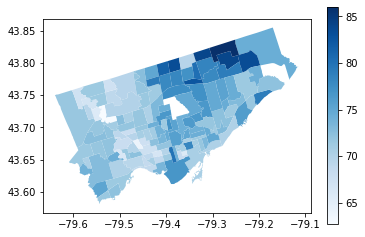

In [ ]:
neighborhood_crime.plot(
    column='Average Aesthetic',
    cmap='Blues',
    legend=True
)

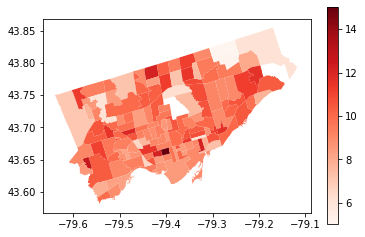

In [ ]:
# Higher Standard Deviation shows that the buildings vary significantly within
# the neighborhood
neighborhood_crime.plot(
    column='Average Aesthetic std',
    cmap='Reds',
    legend=True
)

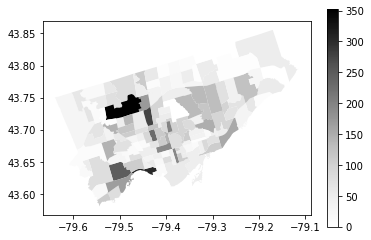

In [ ]:
# This Predcits how easy it would be able to find an apartment
neighborhood_crime.plot(
    column='Num of Apartment (RentSafeTO)',
    cmap='Greys',
    legend=True
)

#Crime Analysis
Let's take a look at the neighborhood trends for each neighborhood to predict it's improvement in thefts

In [ ]:
important_columns=neighborhood_crime[['TheftOver_Rate2021',
                                           'Assault_Rate2021',
                                           'BreakAndEnter_Rate2021',
                                           'Robbery_Rate2021',
                                           'TheftfromMotorVehicle_Rate2021',
                                           'Average Aesthetic',
                                           'F2021_Population_Projection',
                                           'Num of Apartment (RentSafeTO)']]

In [ ]:
important_columns.corr()

,TheftOver_Rate2021,Assault_Rate2021,BreakAndEnter_Rate2021,Robbery_Rate2021,TheftfromMotorVehicle_Rate2021,Average Aesthetic,F2021_Population_Projection,Num of Apartment (RentSafeTO)
TheftOver_Rate2021,1.000000,0.482038,0.552507,0.462077,0.625323,-0.076185,0.135759,0.024938
Assault_Rate2021,0.482038,1.000000,0.685232,0.770923,0.367203,-0.296727,0.151098,0.206939
BreakAndEnter_Rate2021,0.552507,0.685232,1.000000,0.628461,0.410704,-0.161702,0.076213,0.111080
Robbery_Rate2021,0.462077,0.770923,0.628461,1.000000,0.384722,-0.150058,0.128728,0.089481
TheftfromMotorVehicle_Rate2021,0.625323,0.367203,0.410704,0.384722,1.000000,-0.095054,0.029211,-0.002249
Average Aesthetic,-0.076185,-0.296727,-0.161702,-0.150058,-0.095054,1.000000,0.271252,-0.183796
F2021_Population_Projection,0.135759,0.151098,0.076213,0.128728,0.029211,0.271252,1.000000,0.217710
Num of Apartment (RentSafeTO),0.024938,0.206939,0.111080,0.089481,-0.002249,-0.183796,0.217710,1.000000


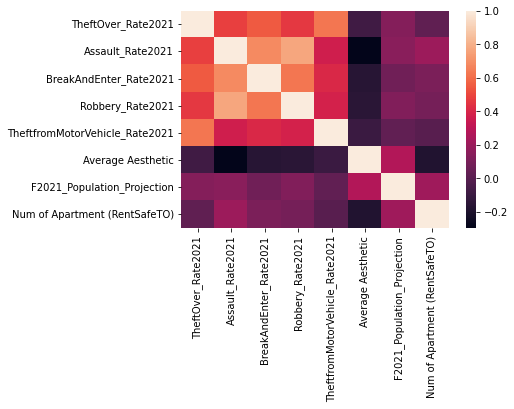

In [ ]:
sns.heatmap(important_columns.corr())

From this heatmap we can see a few interesting trends. For one, we see a slight negative correlation between the number of apartments and the average aesthetic of the buildings. We also see that the assault rate is somewhat correlated with the number of people in a neighborhood and the number of apartments in the neihborhood. As expected we see a negative correlation between the aesthetics of the neighborhood and the various crime rates.

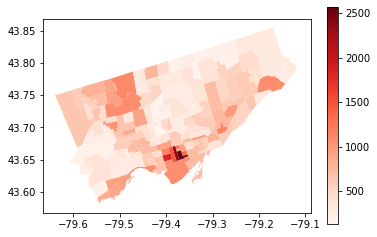

In [ ]:
neighborhood_crime.plot(
    column='Assault_Rate2021',
    cmap='Reds',
    legend=True,
)

In [ ]:
neighborhood_crime.sort_values('Assault_Rate2021',ascending=False)[['HoodName','Assault_Rate2021']].iloc[0:3]

,HoodName,Assault_Rate2021
130,Moss Park,2569.646
22,Church-Yonge Corridor,2367.415
51,Kensington-Chinatown,1854.226


In [ ]:
neighborhood_crime.sort_values('Assault_Rate2021',ascending=True)[['HoodName','Assault_Rate2021']].iloc[0:3]

,HoodName,Assault_Rate2021
54,Forest Hill South,125.6281
135,Pleasant View,152.4658
114,Bedford Park-Nortown,153.8692


The Latest Dataset shows that Moss Park, Church-Yong Corridor and Kensington-Chinatown have the highest rates of Assault while Forest Hill osuth, Pleasant View and Bedfor Park-Nortown have the lowest rates of assault

In [ ]:
Crime_Trends=neighborhood_crime[['HoodName',
                                 'Assault_Rate2014',
                                 'Assault_Rate2015',
                                 'Assault_Rate2016',
                                 'Assault_Rate2017',
                                 'Assault_Rate2018',
                                 'Assault_Rate2019',
                                 'Assault_Rate2020',
                                 'Assault_Rate2021']]

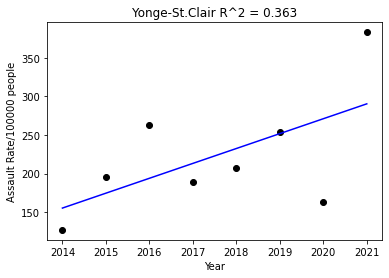

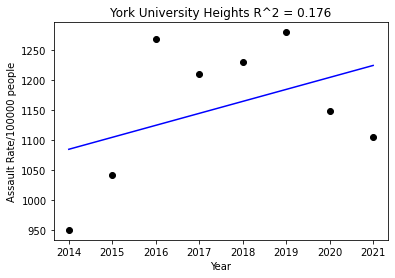

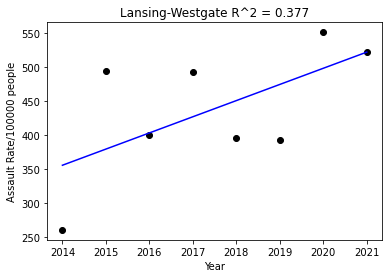

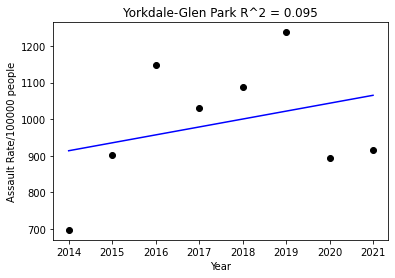

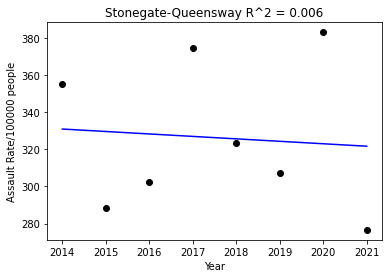

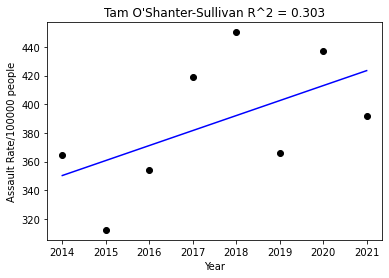

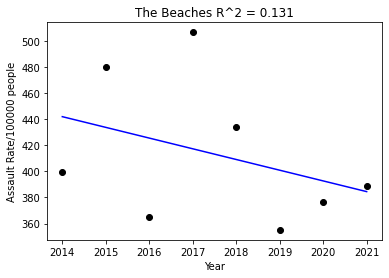

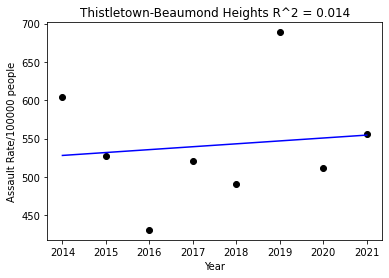

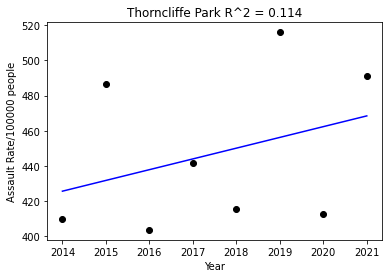

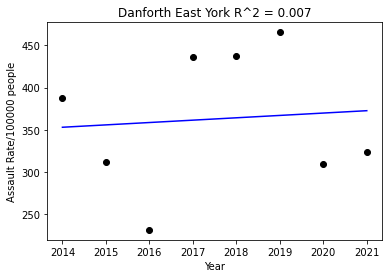

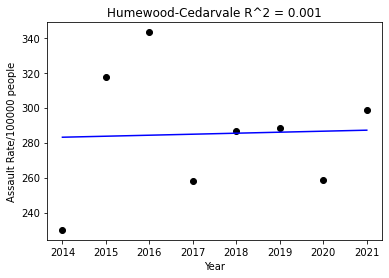

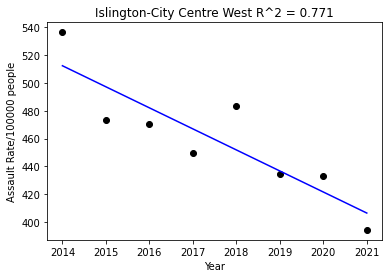

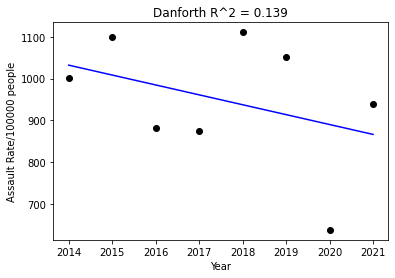

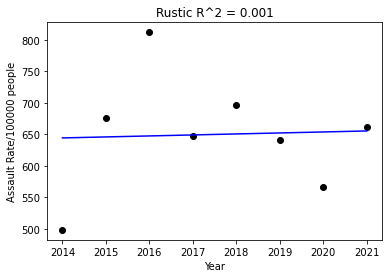

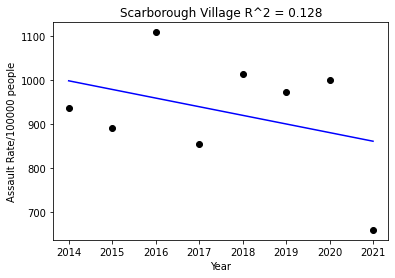

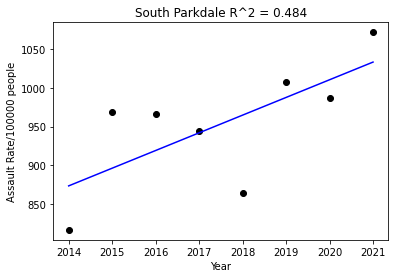

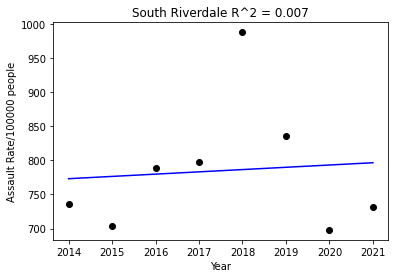

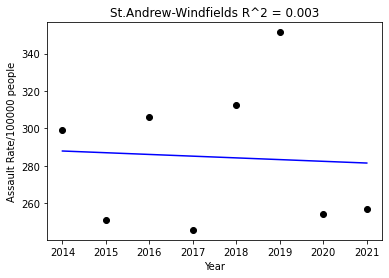

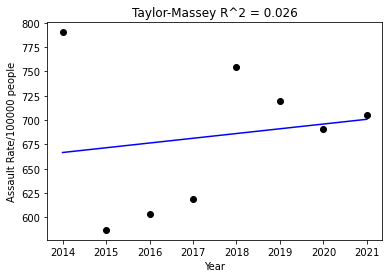

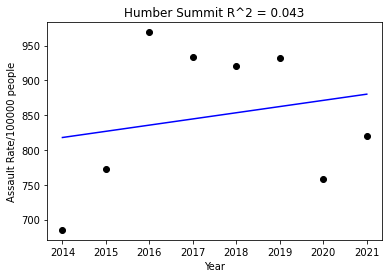

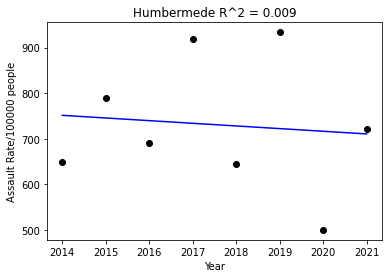

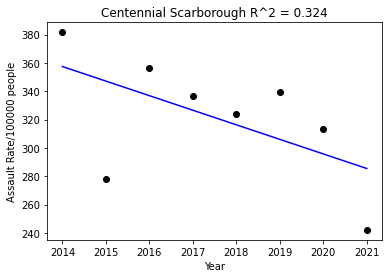

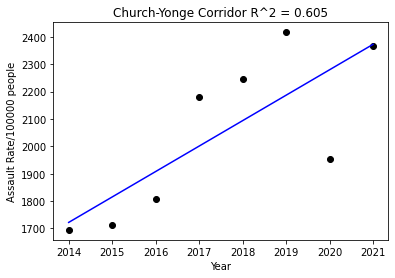

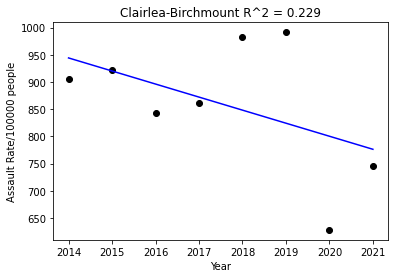

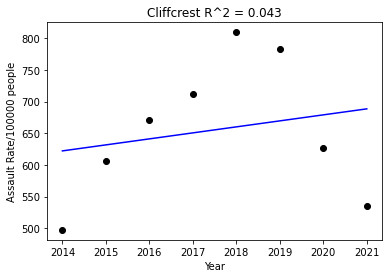

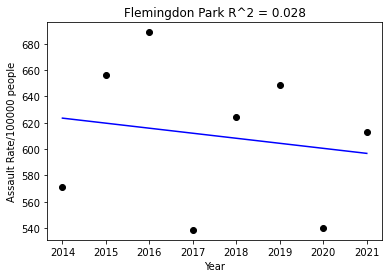

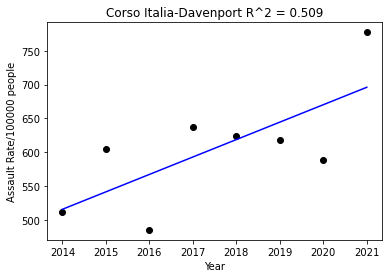

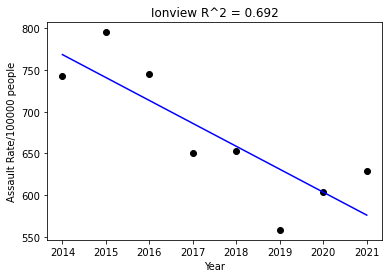

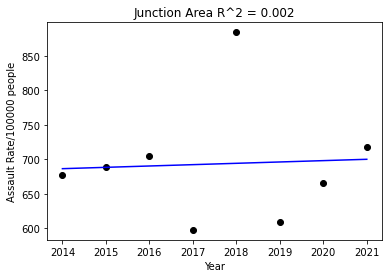

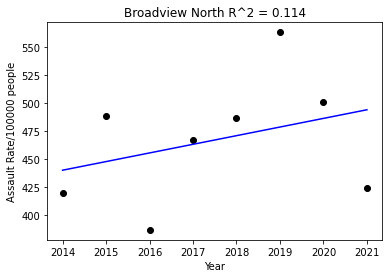

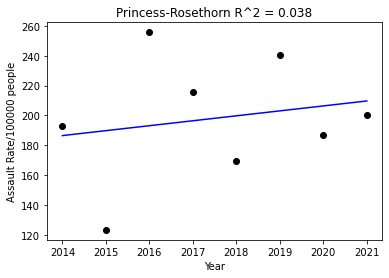

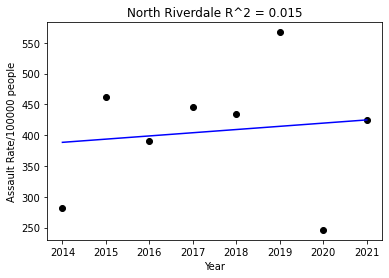

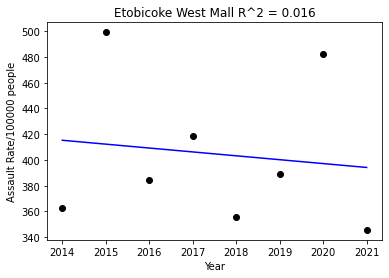

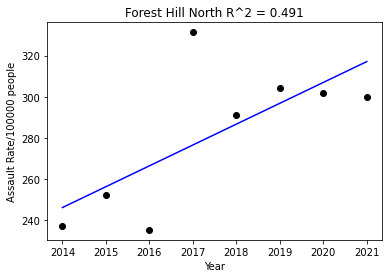

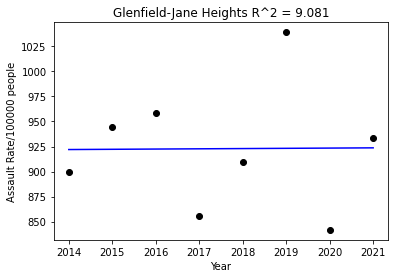

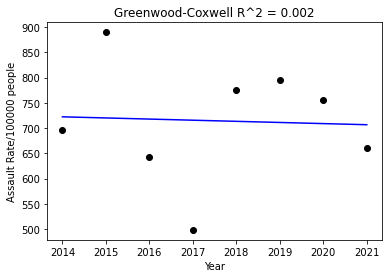

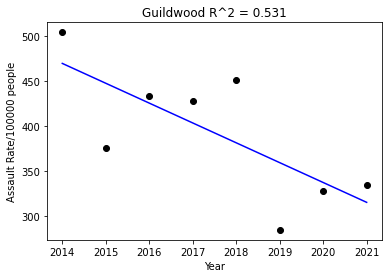

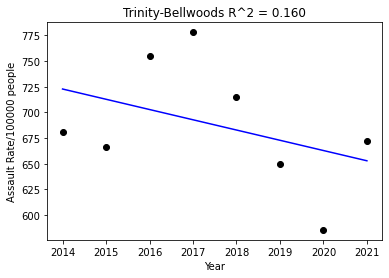

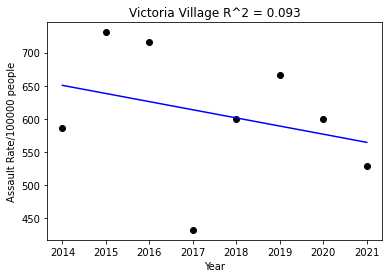

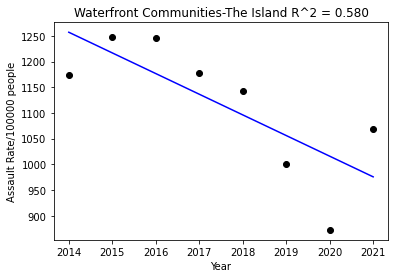

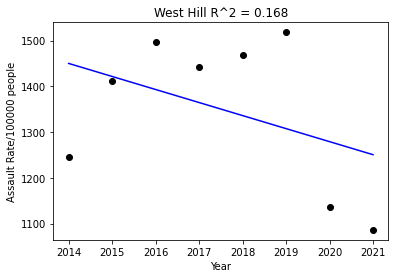

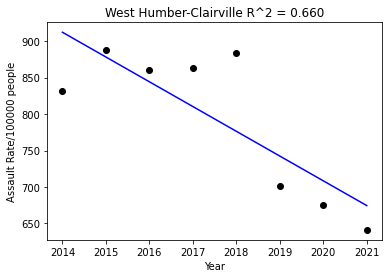

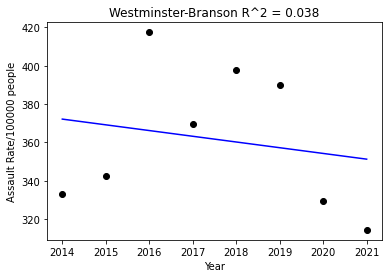

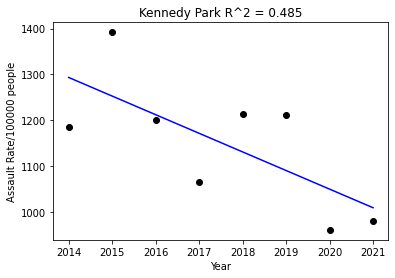

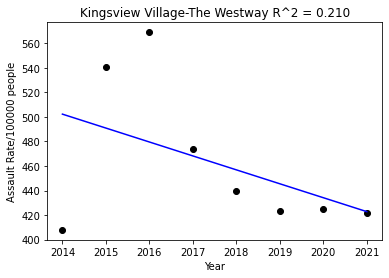

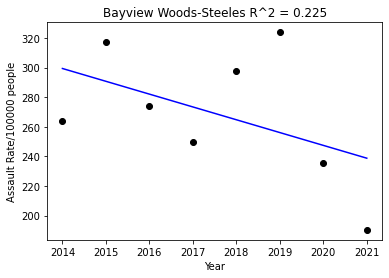

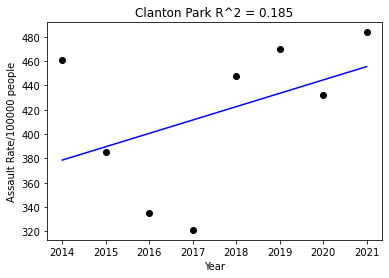

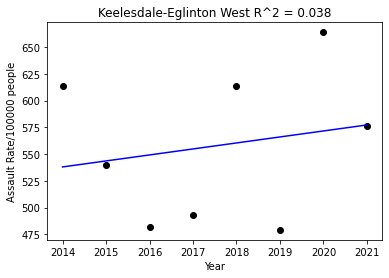

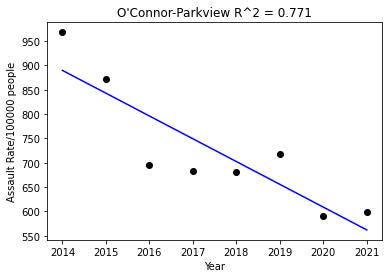

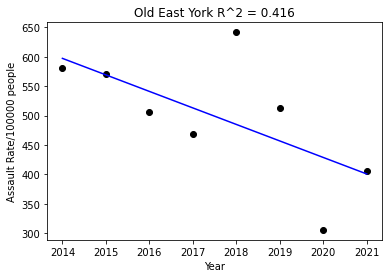

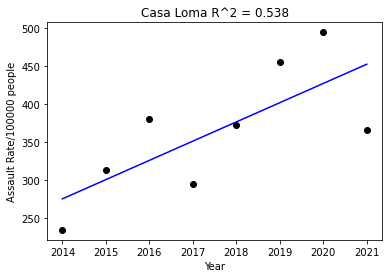

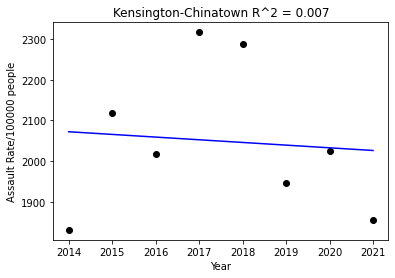

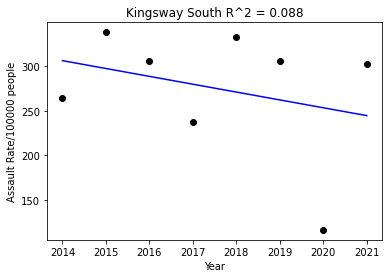

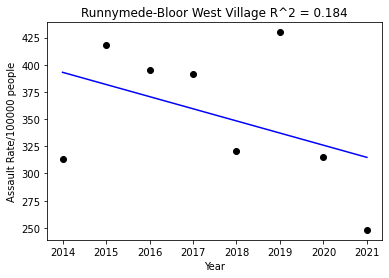

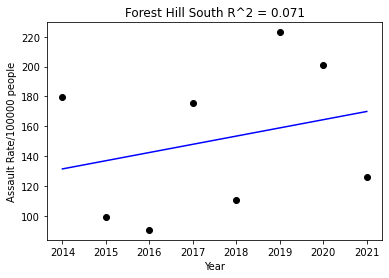

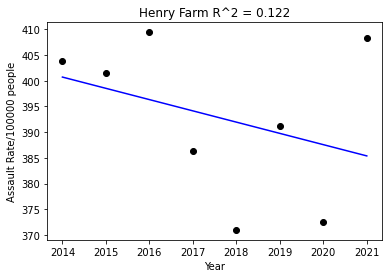

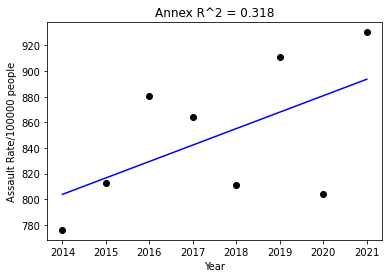

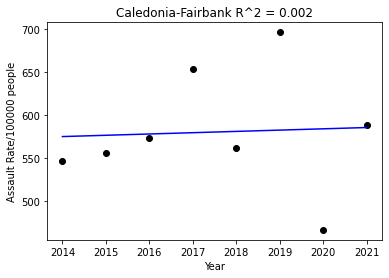

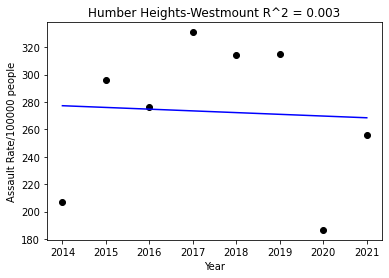

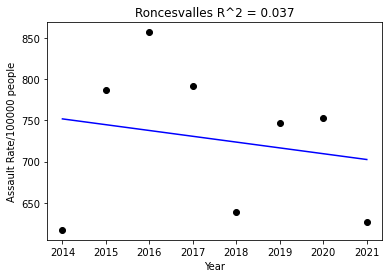

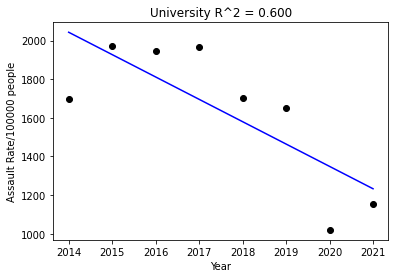

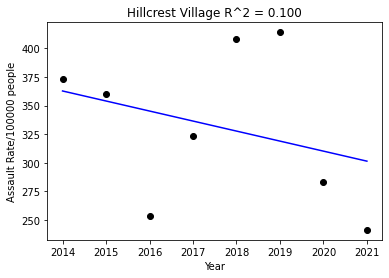

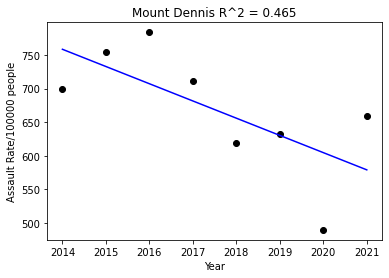

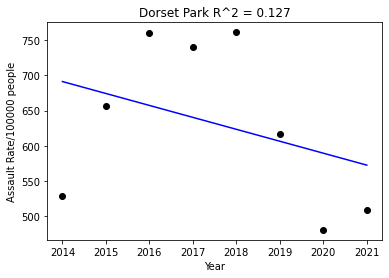

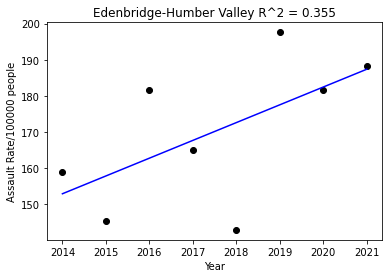

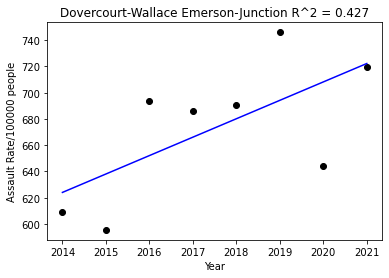

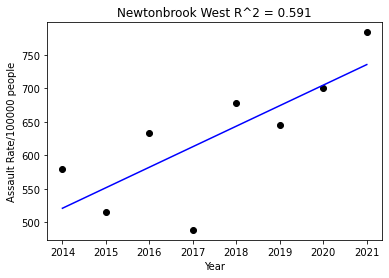

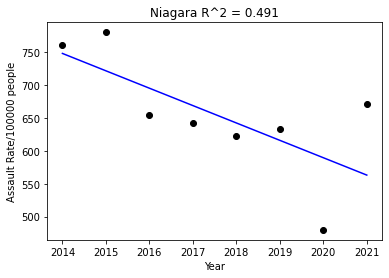

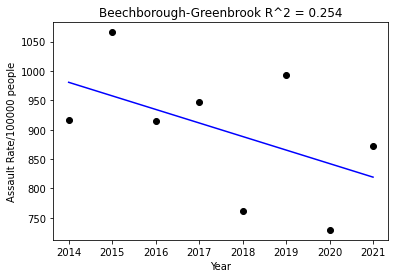

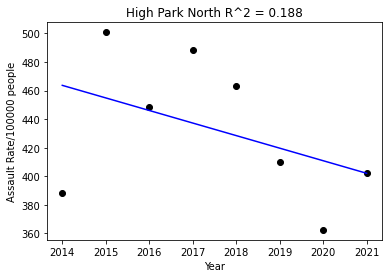

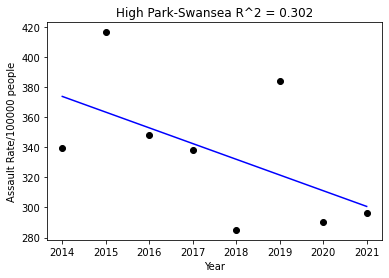

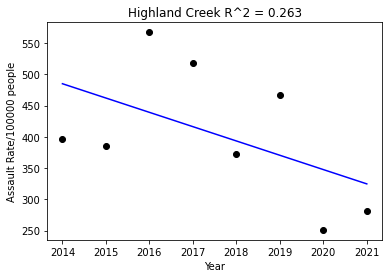

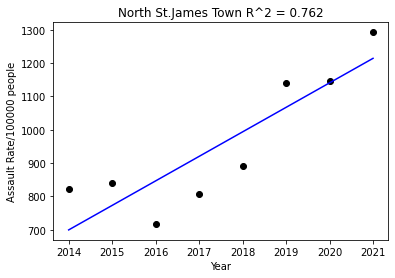

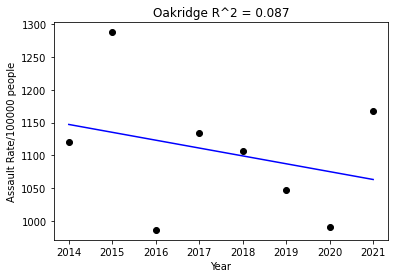

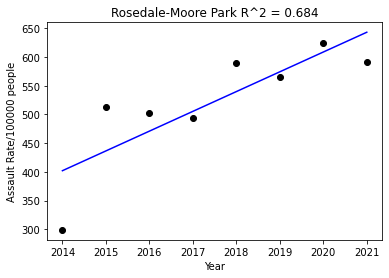

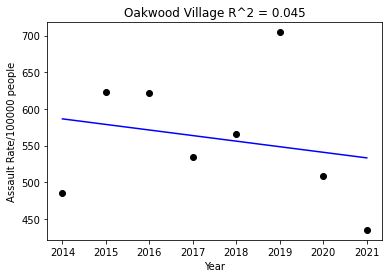

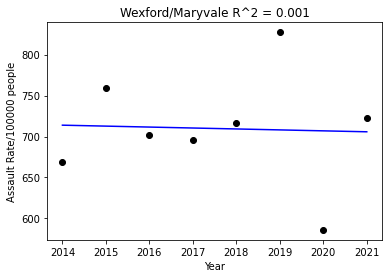

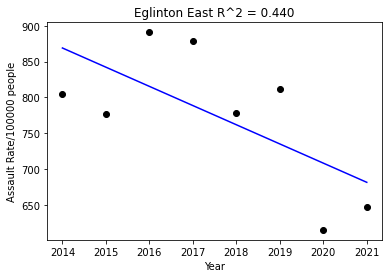

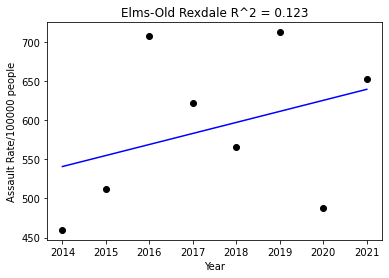

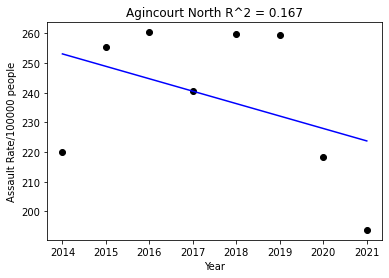

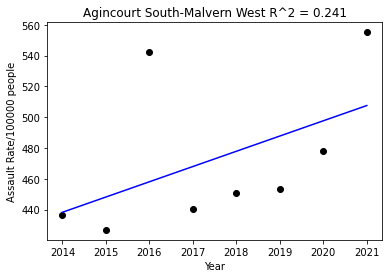

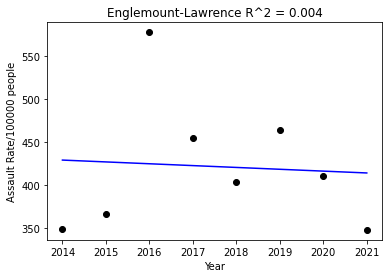

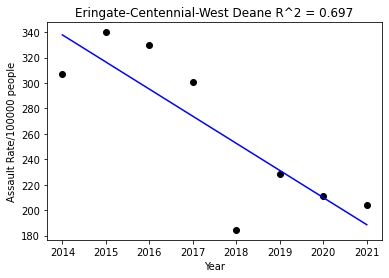

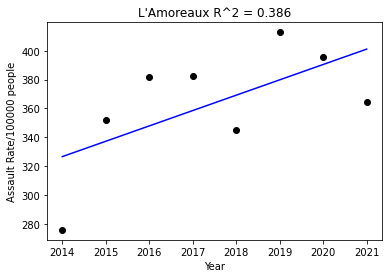

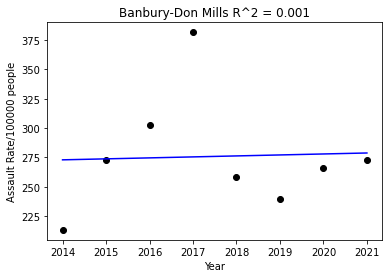

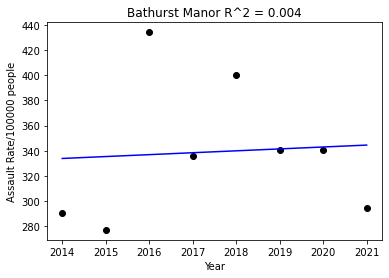

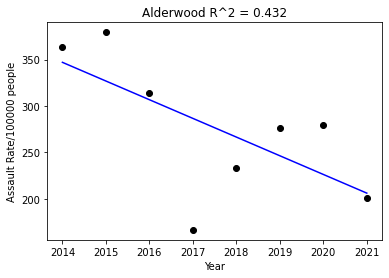

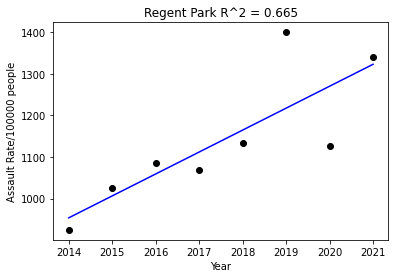

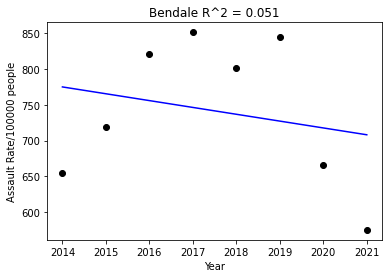

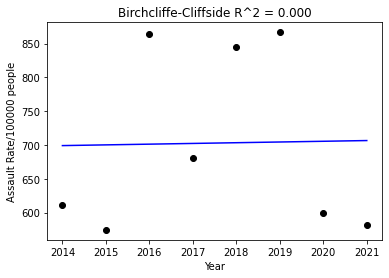

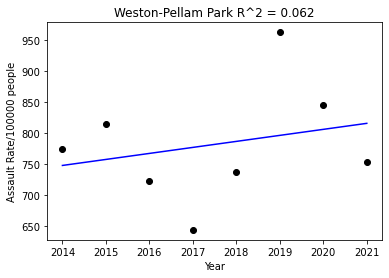

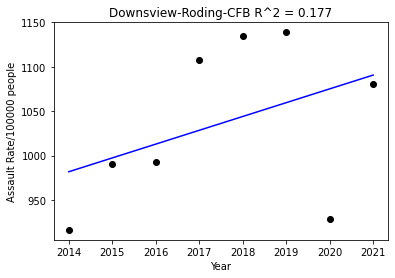

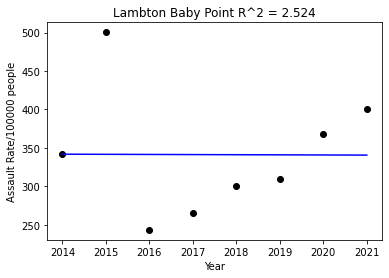

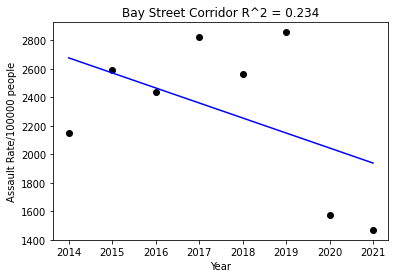

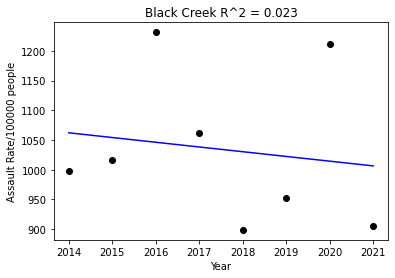

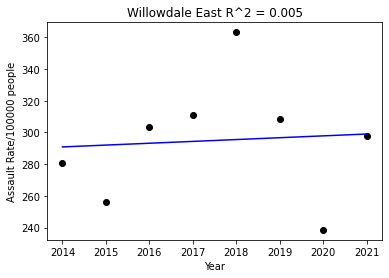

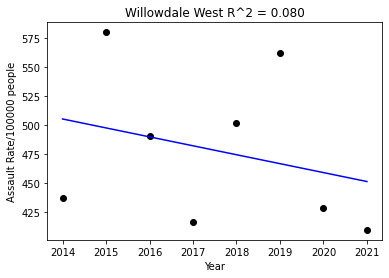

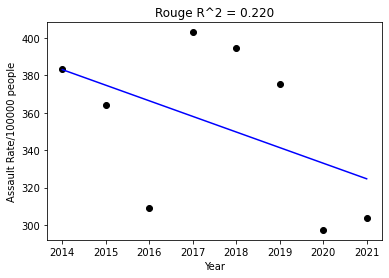

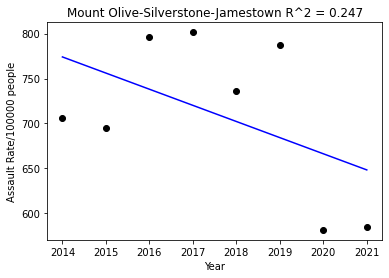

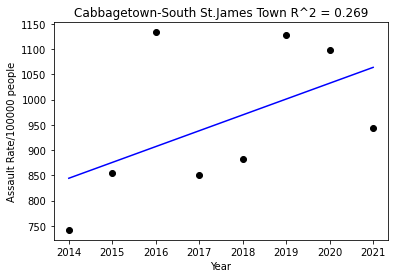

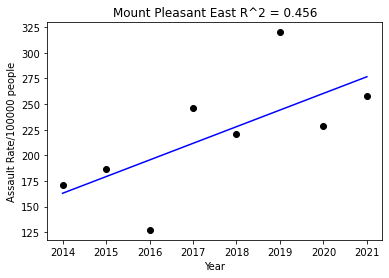

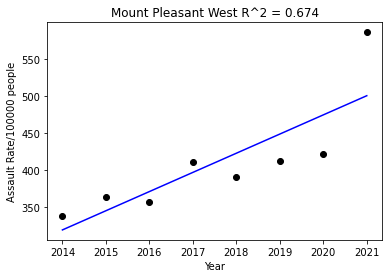

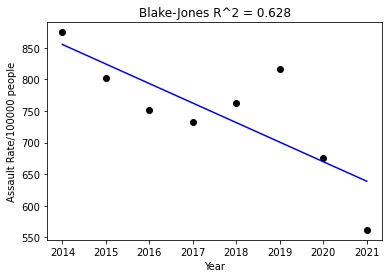

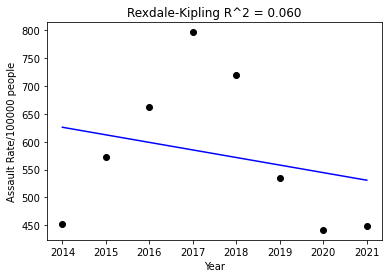

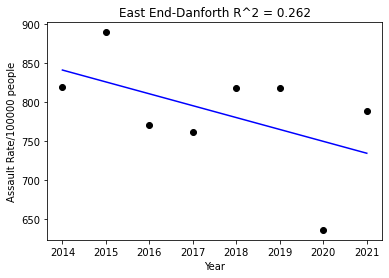

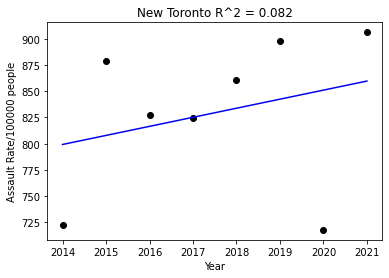

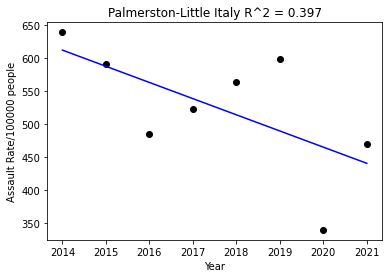

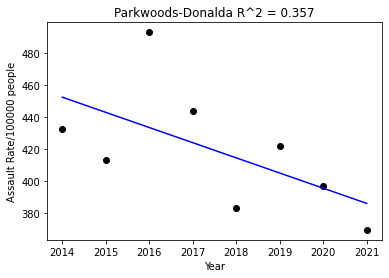

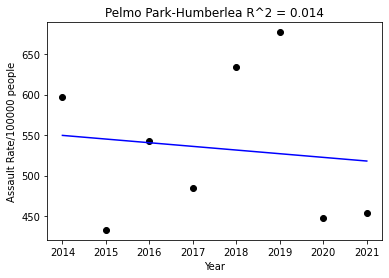

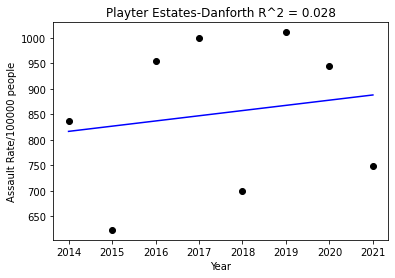

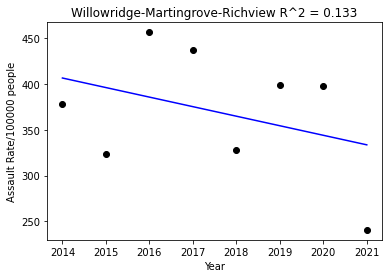

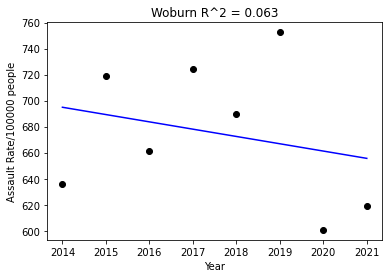

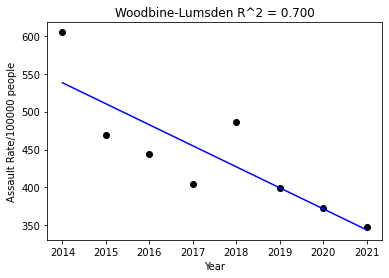

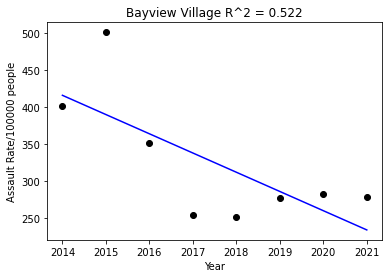

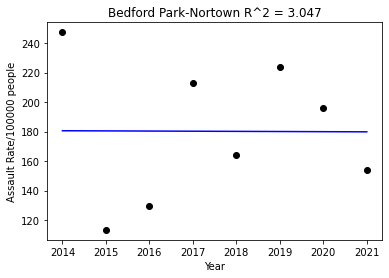

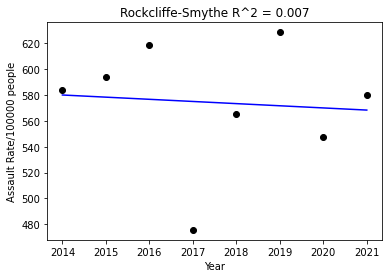

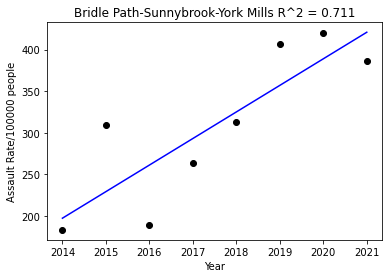

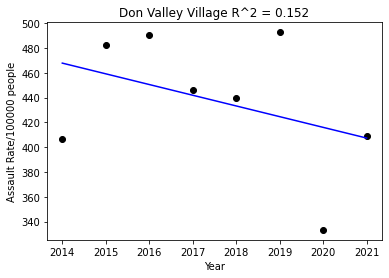

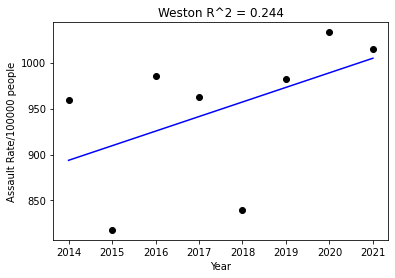

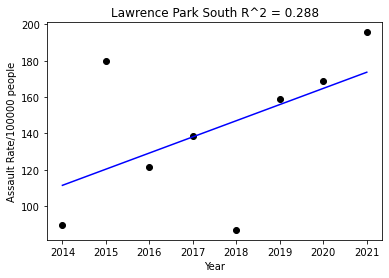

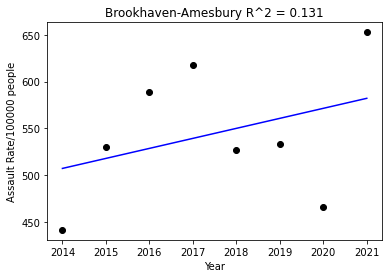

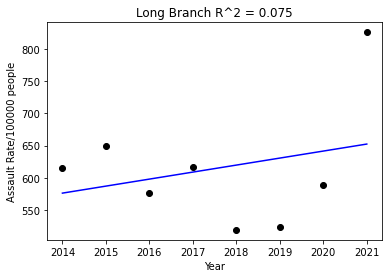

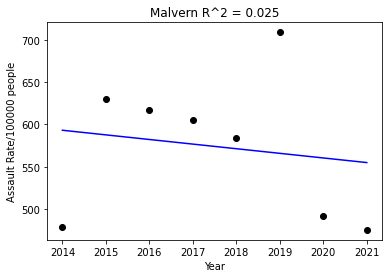

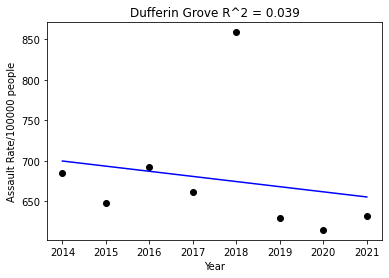

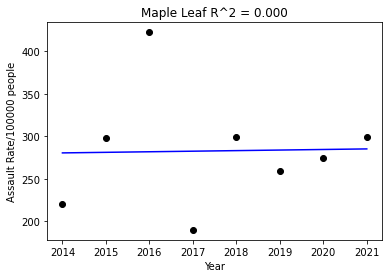

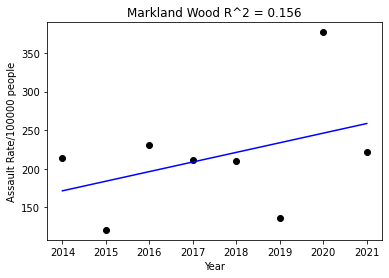

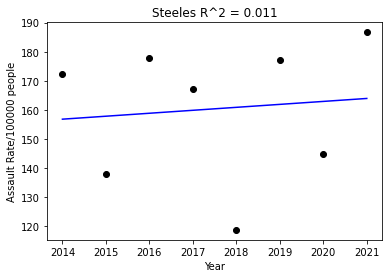

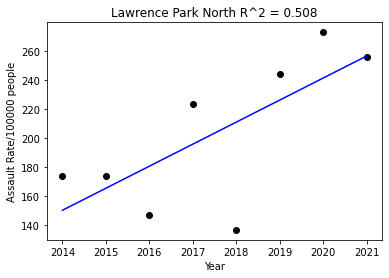

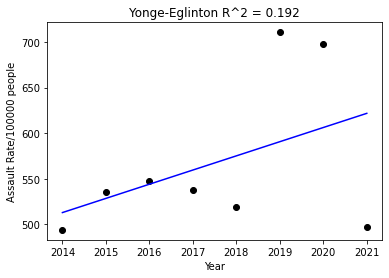

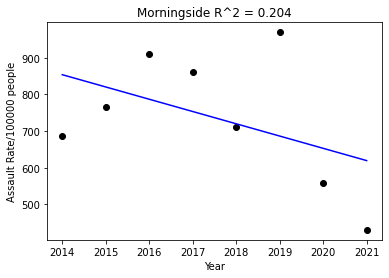

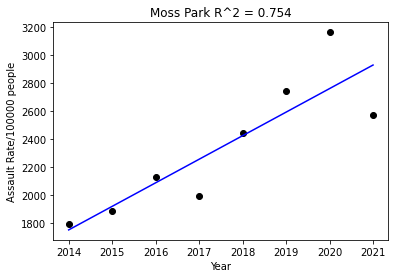

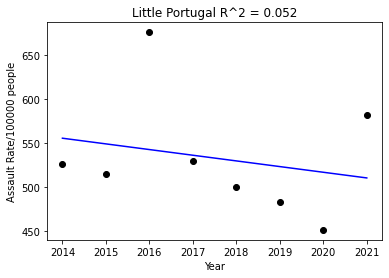

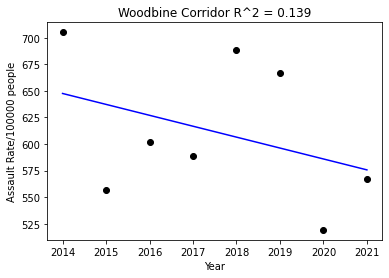

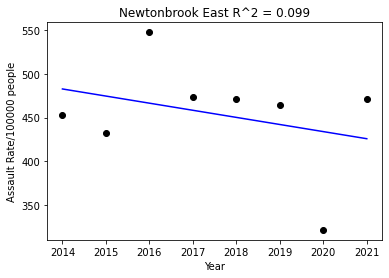

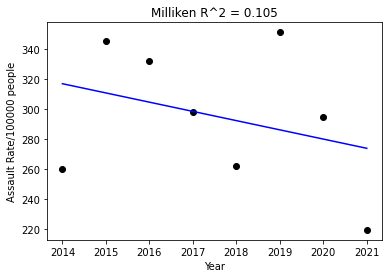

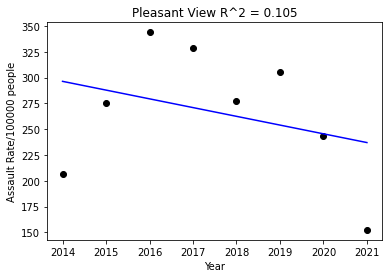

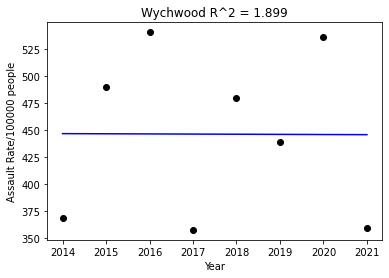

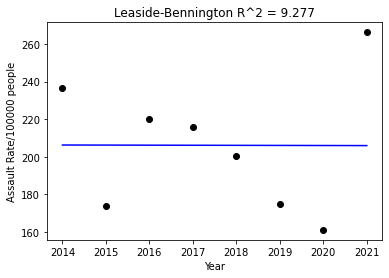

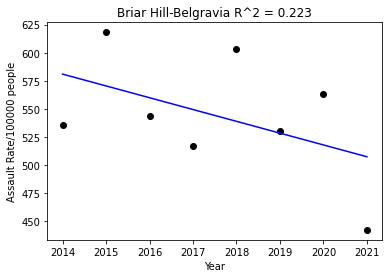

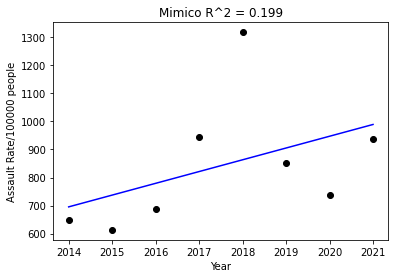

In [ ]:
from sklearn.linear_model import LinearRegression
years=[[2014],[2015],[2016],[2017],[2018],[2019],[2020],[2021]]
model=LinearRegression()
R_2_scores=[]
model_intercepts=[]
model_coeff=[]

for hood in Crime_Trends.iloc:
  hoodname=hood['HoodName']
  y_data=hood[1:].values
  model.fit(years,y_data)
  R_2_scores.append(model.score(years,y_data))
  model_coeff.append(model.coef_[0])
  model_intercepts.append(model.intercept_)
  y_pred=model.predict(years)
  plt.scatter(years,y_data,color='black')
  plt.plot(years,y_pred,color='blue')
  #plt.text(1,1,'R squared score: '+str(model.score(years,y_data)))
  plt.title(hoodname+' R^2 = '+ str(model.score(years,y_data))[0:5])
  plt.ylabel('Assault Rate/100000 people')
  plt.xlabel('Year')
  plt.show()

In [ ]:
neighborhood_crime['Linear Assualt Fit Slope']=model_coeff
neighborhood_crime['Linear Assualt Fit Intercept']=model_intercepts
neighborhood_crime['Linear Assault Fit Score']=R_2_scores

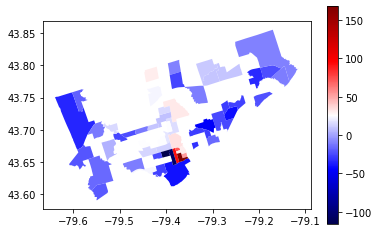

In [ ]:
#plot The expected Crime Rate Using a scorer greater thgan 0.2
neighborhood_crime_high_scores=neighborhood_crime[neighborhood_crime['Linear Assault Fit Score']>0.2]
neighborhood_crime_high_scores.plot(
    column='Linear Assualt Fit Slope',
    cmap='seismic',
    legend=True)

In [ ]:
neighborhood_crime_high_scores.sort_values('Linear Assualt Fit Slope',ascending=False)[['HoodName','Linear Assualt Fit Slope','Linear Assault Fit Score']].iloc[0:3]




,HoodName,Linear Assualt Fit Slope,Linear Assault Fit Score
130,Moss Park,167.811738,0.754164
22,Church-Yonge Corridor,92.890476,0.605795
72,North St.James Town,73.508545,0.762592


In [ ]:
neighborhood_crime_high_scores.sort_values('Linear Assualt Fit Slope',ascending=True)[['HoodName','Linear Assualt Fit Slope','Linear Assault Fit Score']].iloc[0:3]

,HoodName,Linear Assualt Fit Slope,Linear Assault Fit Score
60,University,-115.718583,0.600159
93,Bay Street Corridor,-105.437595,0.234307
48,O'Connor-Parkview,-46.840818,0.771069


The Places with a rapidly lowering crime rates (Assaults) are University, Bay Street Corridor, O'Connor-Parkview and Kennedy Park.
The Neighborhoods with the most rapidily rising crime rates (Assaults) are Moss Park, Church-Yong Corridor and North St. James Town

# Home Prices

Note that the latest available home prices are from 2011 which are unfortunately very much outdata so some caution must be taken.

In [ ]:
home_prices=pd.read_excel('wellbeing-toronto-housing.xlsx','RawDataRef_2011')

In [ ]:

neighboorhood_2011_price=[]
for neighborhood_crime_instance in neighborhood_crime.iloc:
  try:
    neighboorhood_2011_price.append((home_prices[home_prices['Neighbourhood']==neighborhood_crime_instance['HoodName']]['Home Prices']).values[0])
    # Some Neighborhoods exist in the neighborhood crime set but not in the home prices
  except: 
    neighboorhood_2011_price.append(np.nan)

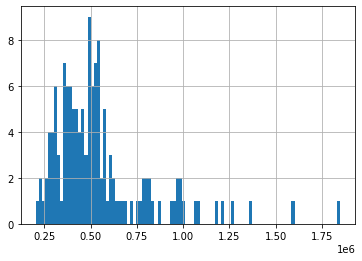

In [ ]:
neighborhood_crime['Home Prices'].hist(bins=100)

In [ ]:
neighborhood_crime.sort_values('Home Prices',ascending=False)[['HoodName','Home Prices']].iloc[0:3]


,HoodName,Home Prices
116,Bridle Path-Sunnybrook-York Mills,1849084.0
54,Forest Hill South,1585984.0
17,St.Andrew-Windfields,1363202.0


In [ ]:
neighborhood_crime.sort_values('Home Prices',ascending=True)[['HoodName','Home Prices']].iloc[0:3]

,HoodName,Home Prices
25,Flemingdon Park,204104.0
78,Elms-Old Rexdale,233832.0
94,Black Creek,235143.0


Text(0.5, 1.0, 'Home Prices 2011')

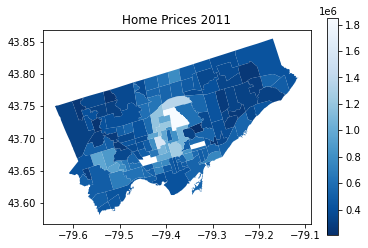

In [ ]:
neighborhood_crime.plot(
    column='Home Prices',
    cmap='Blues_r',
    legend=True,
)
plt.title('Home Prices 2011')

Text(0.5, 1.0, 'Home Prices 2011')

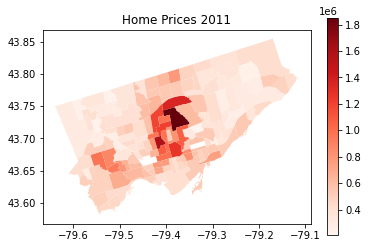

In [ ]:
neighborhood_crime['Home Prices']=neighboorhood_2011_price
neighborhood_crime.plot(
    column='Home Prices',
    cmap='Reds',
    legend=True
)
plt.title('Home Prices 2011')

Correlating Crime Rate to Housing Prices

In [ ]:
# We want to correlate 2011 Housing Prices to Crime Rates so we will look at 
# 2014 Crime Rates
neighborhood_crime_2014=neighborhood_crime[['Assault_Rate2014',
                                            'AutoTheft_Rate2014',
                                            'BreakAndEnter_Rate2014',
                                            'Robbery_Rate2014',
                                            'TheftOver_Rate2014',
                                            'Homicide_Rate2014',
                                            'Shooting_Rate2014',
                                            'TheftfromMotorVehicle_Rate2014',
                                            'Home Prices']]

In [ ]:
neighborhood_crime_2014.corr()

,Assault_Rate2014,AutoTheft_Rate2014,BreakAndEnter_Rate2014,Robbery_Rate2014,TheftOver_Rate2014,Homicide_Rate2014,Shooting_Rate2014,TheftfromMotorVehicle_Rate2014,Home Prices
Assault_Rate2014,1.000000,0.142481,0.466618,0.801809,0.482530,-0.119628,0.251362,0.510289,-0.363835
AutoTheft_Rate2014,0.142481,1.000000,0.150250,0.198850,0.364447,-0.180073,0.068576,0.248661,-0.213506
BreakAndEnter_Rate2014,0.466618,0.150250,1.000000,0.508014,0.446466,0.246833,-0.097103,0.541180,0.300702
Robbery_Rate2014,0.801809,0.198850,0.508014,1.000000,0.350109,-0.212847,0.246227,0.460046,-0.285253
TheftOver_Rate2014,0.482530,0.364447,0.446466,0.350109,1.000000,-0.208544,0.022248,0.479068,0.085530
Homicide_Rate2014,-0.119628,-0.180073,0.246833,-0.212847,-0.208544,1.000000,-0.040478,0.003220,0.055909
Shooting_Rate2014,0.251362,0.068576,-0.097103,0.246227,0.022248,-0.040478,1.000000,0.013256,-0.201982
TheftfromMotorVehicle_Rate2014,0.510289,0.248661,0.541180,0.460046,0.479068,0.003220,0.013256,1.000000,0.013490
Home Prices,-0.363835,-0.213506,0.300702,-0.285253,0.085530,0.055909,-0.201982,0.013490,1.000000


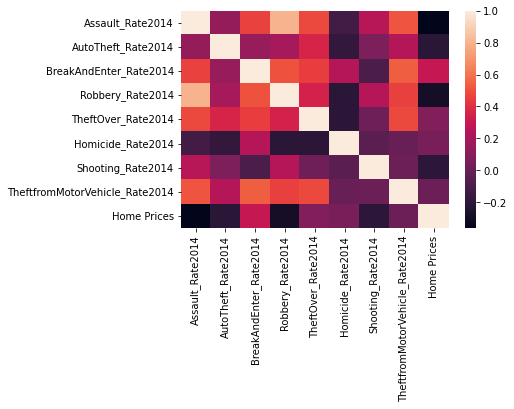

In [ ]:
sns.heatmap(neighborhood_crime_2014.corr())

Interestingly enough for the most part crime rates are either not associated with housing prices or have a negative correlation with housing prices, however break and enters have a positive correlation with the home prices of a neighborhood